# Student Stress Factors: Predictive Models

The purpose of this project is to develop a predictive model that helps identify the key factors contributing to student stress, thereby enabling educational institutions to implement targeted interventions. By understanding the impact of these factors on student stress, the project aims to enhance student well-being and academic performance.

**_Goals of the project:_**

1. Identify key influential factors that have the most significant impact on student stress level.
2. Provide actionable insights for educational institutions to design targeted intervention strategies to mitigate student stress.
3. Construct a predictive model that accurately forecasts student stress level based on stress factors.

**_Materials and Research Questions:_**

The project is using Student Stress Factors dataset, which was generated based on author's inspriration from several research papers, particularly:

[1] Arip, M. A., Kamaruzaman, D. N. B., Roslan, A. B., & Ahmad, A. B. (2020) and . _Student Stress Inventory (SSI)_. Perak: Sultan Idris Education University.

[2] Gadzella, B. M., Baloglu, M., Masten, W. G., & Wang, Q. (2012). _Evaluation of the student life-stress inventory-revised._ Journal of Instructional Psychology, 39(2).

The dataset consists of data gathered through a combination of online and offline surveys. This dataset contains around 20 features that create the most impact on the Stress of a Student. The features are selected scientifically considering 5 major factors, which are Psychological, Physiological, Social, Environmental, and Academic Factors:

- Psychological Factors => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
- Physiological Factors => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'
- Environmental Factors => 'noise_level', 'living_conditions', 'safety', 'basic_needs'
- Academic Factors => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'
- Social Factor => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

The size of the dataset is 23KB, which is taken from Kaggle: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data/data

In this project, the following research question will be addressed:
1. How do psychological, physiological, social, environmental, and academic factors correlate with the stress levels of students?
2. What are the key features that significantly influence student stress levels?
3. How can we create a predictive model for student stress based on these identified factors?
4. How can interventions be tailored based on the identified stress factors to effectively reduce student stress level?

**_Outline of the project:_**
1. Download the dataset from Kaggle.
2. Data Preprocessing.
3. Exploratory Data Analysis and Visualizations.
4. Predictive Modeling.
5. Results and Discussion.

### 1. Download the dataset from the Kaggle:

Firstly, we'll download the dataset. Then, we'll install and import the libraries.

In [1]:
! pip install opendatasets --quiet
! pip install --upgrade matplotlib seaborn

In [2]:
import opendatasets as od 
dataset_url = 'https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data'
od.download(dataset_url)

Skipping, found downloaded files in ".\student-stress-factors-a-comprehensive-analysis" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Data Preprocessing:

This section involves loading the dataset into a DataFrame, inspecting the columns and rows, conducting descriptive statistics to understand the dataset's features, documenting insights, and identifying any missing values and duplicate records.

In [4]:
df = pd.read_csv('.\student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')
df.head(5)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [5]:
df.shape

(1100, 21)

In [6]:
df.tail(5)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2


In [7]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [9]:
print('There is a total of {} missing values in the dataset.'.format(df.isna().sum().sum()))

There is a total of 0 missing values in the dataset.


In [10]:
print('There are {} duplicated rows in the dataset.'.format(df.duplicated().sum()))

There are 0 duplicated rows in the dataset.


In [11]:
print(df.dtypes)

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


### 3. Exploratory Analysis and Visualizations:

**_a) Brief Analysis:_**

Using the describe method for 20 columns can be overwhelming. Instead, boxplots can be utilized for each column to visualize the data more effectively.

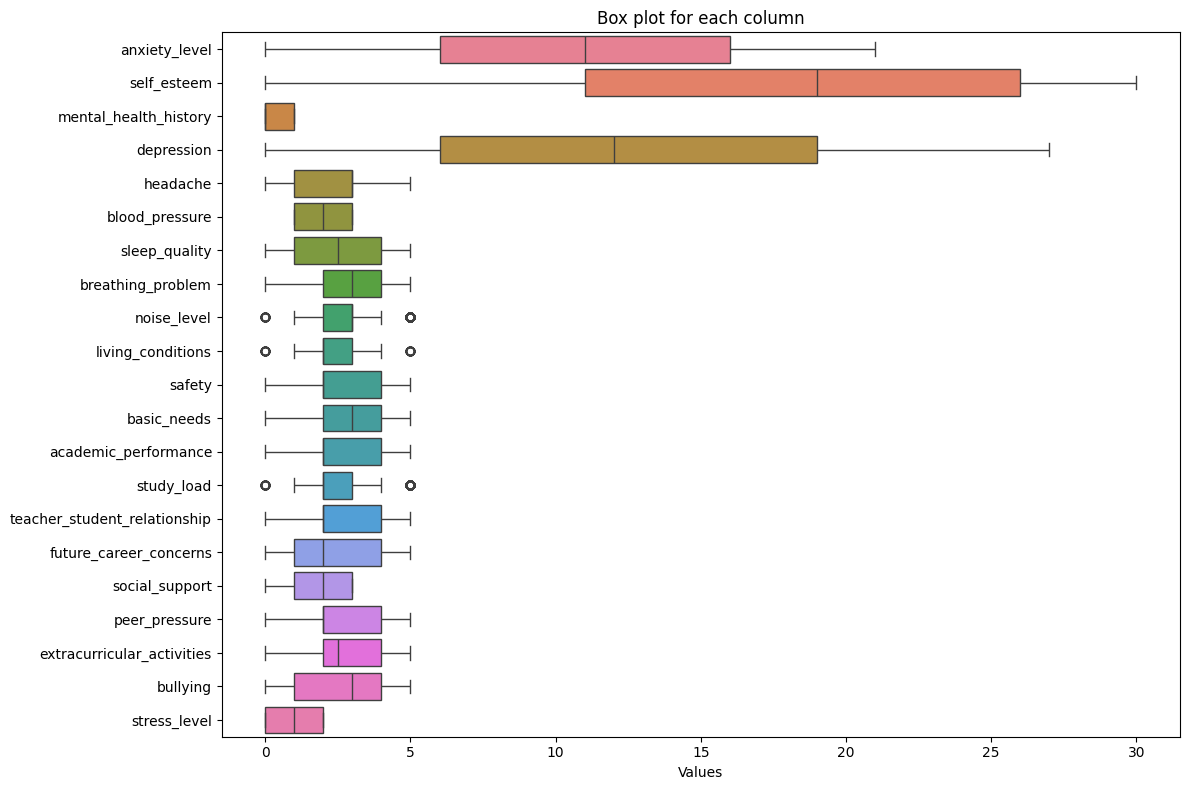

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(df, orient='h')
plt.title('Box plot for each column')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

Not all values in the dataset are measured on the same scale, which can influence how we analyze and interpret the data. Different columns require different analytical approaches to account for their unique scales and value types.
Some of these scales are:
- _Boolean values:_ 

In [13]:
df['mental_health_history'].describe()

count    1100.000000
mean        0.492727
std         0.500175
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: mental_health_history, dtype: float64

- _Columns with unique scales_: Anxiety level (0 to 21), Self-esteem (0 to 30), Depression (0 to 27), Blood pressure (1 to 3) Stress level (0 to 2). These unique scales make direct comparisons between columns difficult without normalization or scaling.

In [14]:
df[['anxiety_level','self_esteem','depression']].describe()

,anxiety_level,self_esteem,depression
count,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,12.555455
std,6.117558,8.944599,7.727008
min,0.000000,0.000000,0.000000
25%,6.000000,11.000000,6.000000
50%,11.000000,19.000000,12.000000
75%,16.000000,26.000000,19.000000
max,21.000000,30.000000,27.000000


In [15]:
df['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

In [16]:
df['blood_pressure'].value_counts()

blood_pressure
3    500
1    300
2    300
Name: count, dtype: int64

**_b) Descriptive Statistics:_**

**1. How many students reporting negative experiences or conditions by factor?**

Quick explonation from the person who uploaded the dataset:

- Anxiety : range from 0 to 21, Measure : GAD-7
- Self-esteem : range 0 to 30, Measure: Rosenberg Self Esteem Scale
- Mental Health History : 0 if no mental health history, 1 if mental health history
- Depression : range 0 to 27, Measure: Patient Health Questionnaire (PHQ-9)
Other features mostly range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.
- Blood pressure: range 1 to 3 (1 is low, 2 is normal, 3 is high)
- Stress level: range 0 to 2 (0 low level/absent, 1 medium level, 2 high level)

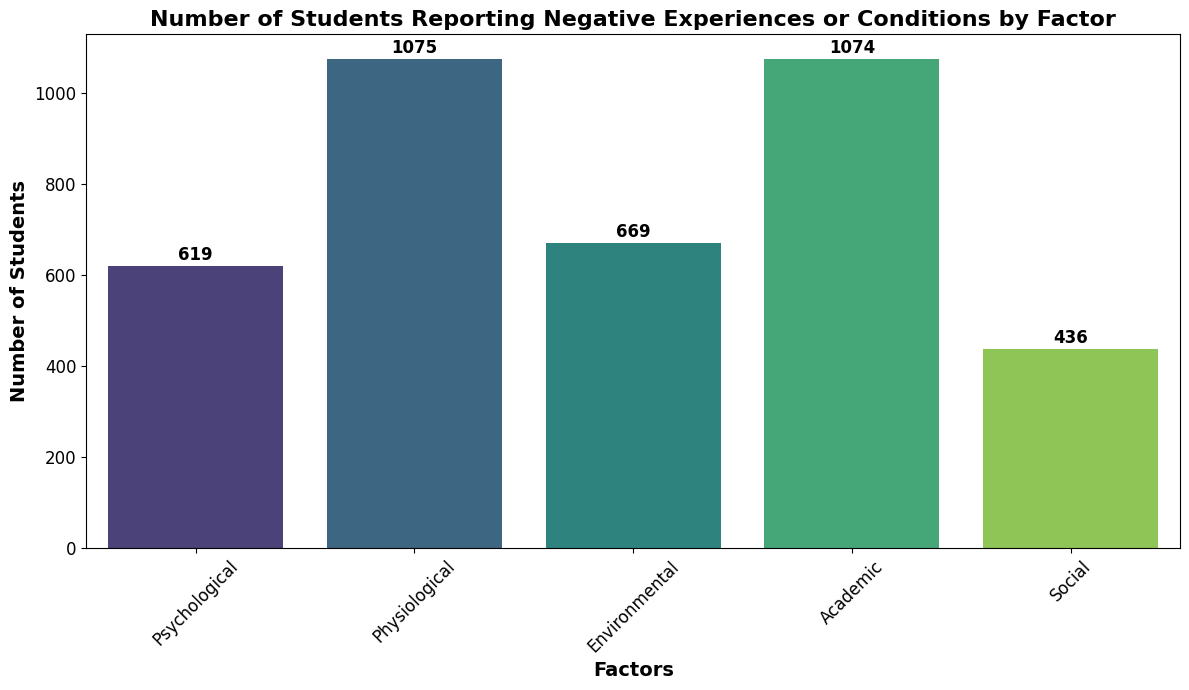

In [17]:
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

num_students_with_negative_psychological = df[psychological_factors].apply(
    lambda x: ((x['anxiety_level'] > 15) | (x['self_esteem'] < 15) | (x['mental_health_history'] == 1) | (x['depression'] > 20)).sum(), axis=1
)

num_students_with_negative_physiological = df[physiological_factors].apply(
    lambda x: ((x > 3) | (x == 1)).sum(), axis=1
)

num_students_with_negative_environmental = df[environmental_factors].apply(
    lambda x: (x > 3).sum(), axis=1
)

num_students_with_negative_academic = df[academic_factors].apply(
    lambda x: (x < 3).sum(), axis=1
)

num_students_with_negative_social = df[social_factors].apply(
    lambda x: (x > 3).sum(), axis=1
)

negative_experiences = [
    (num_students_with_negative_psychological > 0).sum(),
    (num_students_with_negative_physiological > 0).sum(),
    (num_students_with_negative_environmental > 0).sum(),
    (num_students_with_negative_academic > 0).sum(),
    (num_students_with_negative_social > 0).sum()
]

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

plt.figure(figsize=(12, 7))
palette = sns.color_palette("viridis", len(factors))
sns.barplot(x=factors, y=negative_experiences, hue=factors, palette=palette, dodge=False, legend=False)

plt.title("Number of Students Reporting Negative Experiences or Conditions by Factor", fontsize=16, weight='bold')
plt.xlabel("Factors", fontsize=14, weight='bold')
plt.ylabel("Number of Students", fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(negative_experiences):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


<font size="5">_Psychological Factors:_<font>

**2. How many students have a self-esteem level below the average?**

Number of students with self-esteem below the average: 507


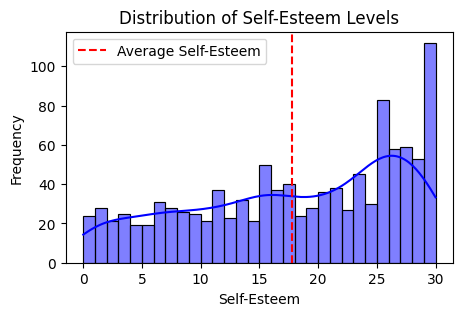

In [18]:
num_students = len(df)
average_self_esteem = df['self_esteem'].mean()
students_below_average_self_esteem = df[df['self_esteem'] < average_self_esteem]
num_students_below_average_self_esteem = len(students_below_average_self_esteem)

print("Number of students with self-esteem below the average:", num_students_below_average_self_esteem)
plt.figure(figsize=(5, 3))
sns.histplot(df['self_esteem'], bins=30, kde=True, color='blue')
plt.axvline(average_self_esteem, color='red', linestyle='--', label='Average Self-Esteem')
plt.title('Distribution of Self-Esteem Levels')
plt.xlabel('Self-Esteem')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**3. What percentage of students have reported experiencing depression?**

Percentage of students experiencing depression: 56.36%


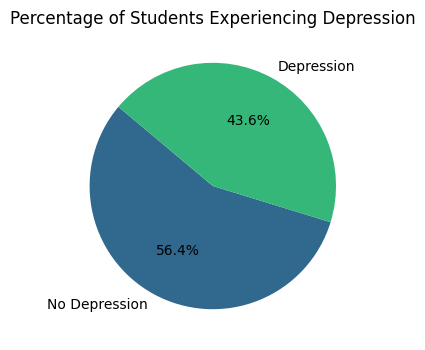

In [19]:
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)
if 'num_students' not in locals():
    num_students = len(df)
percentage_students_experiencing_depression = (df['depression_binary'].sum() / num_students) * 100

print(f"Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

depression_counts = df['depression_binary'].value_counts()

plt.figure(figsize=(4, 4))
colors = sns.color_palette('viridis', 2)
plt.pie(depression_counts, labels=['No Depression', 'Depression'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Percentage of Students Experiencing Depression')
plt.show()

**4. What is the average anxiety level of students in the dataset?**

Average anxiety level of students: 11.063636363636364


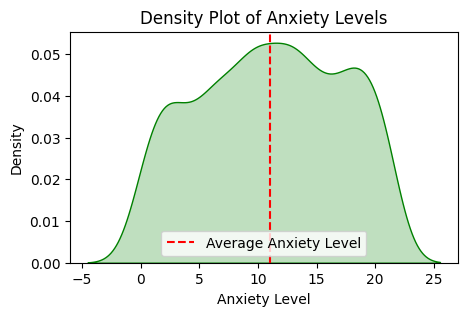

In [20]:
average_anxiety_level = df['anxiety_level'].mean()

print("Average anxiety level of students:", average_anxiety_level)
plt.figure(figsize=(5, 3))
sns.kdeplot(df['anxiety_level'], color='green', fill=True)
plt.axvline(average_anxiety_level, color='red', linestyle='--', label='Average Anxiety Level')
plt.title('Density Plot of Anxiety Levels')
plt.xlabel('Anxiety Level')
plt.ylabel('Density')
plt.legend()
plt.show()

**5. How many students have reported a history of mental health issues?**

Number of students with a history of mental health issues: 542


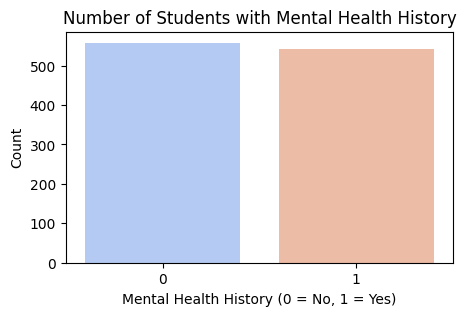

In [21]:
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len(students_with_mental_health_history)

print("Number of students with a history of mental health issues:", num_students_with_mental_health_history)
plt.figure(figsize=(5, 3))
sns.countplot(x='mental_health_history', data=df, hue='mental_health_history', palette='coolwarm', legend=False)
plt.title('Number of Students with Mental Health History')
plt.xlabel('Mental Health History (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

<font size="5">_Physiological Factors:_<font>

**6. How many students experience headaches frequently?**

**7. What is the average blood pressure reading among the students?**

**8. How many students rate their sleep quality as poor?**

The first two questions are ambiguous given the limitations of the dataset, which preclude definitive answers. 

Regarding headaches, values of 3 or higher are interpreted as indicative of 'frequent' occurrences, though they may also reflect severity. 

Similarly, determining average blood pressure precisely is challenging due to the absence of exact numerical data. An estimate is inferred where a scale of 1 represents an average of 90/60, 2 represents 110/75, and 3 represents 130/90, assuming consistent relative standard deviations as observed in the original blood pressure data.

Number of students experiencing headaches frequently: 556
The average blood pressure is: 113.6/77.7
Number of students with bad sleep quality: 550


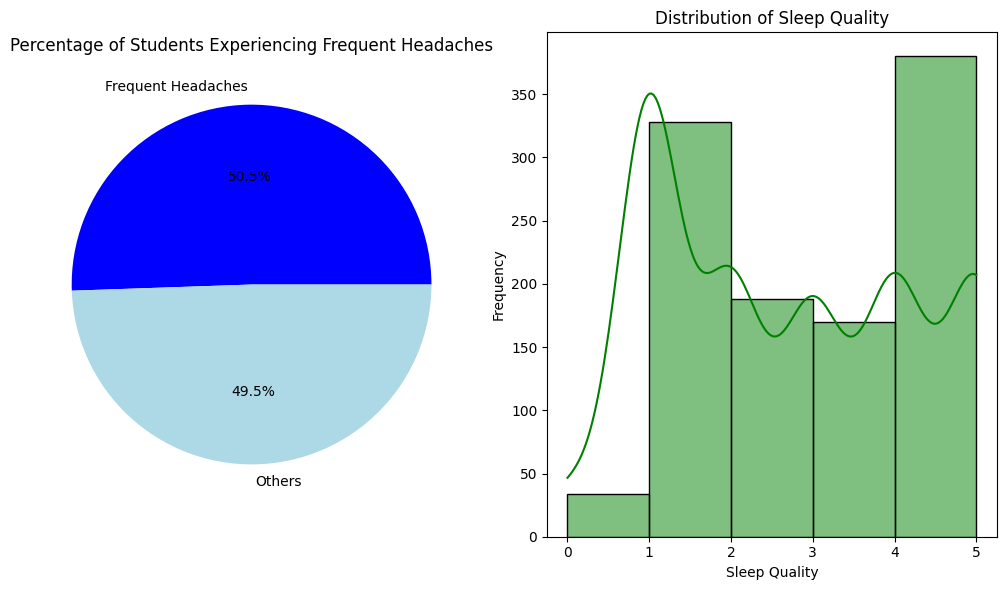

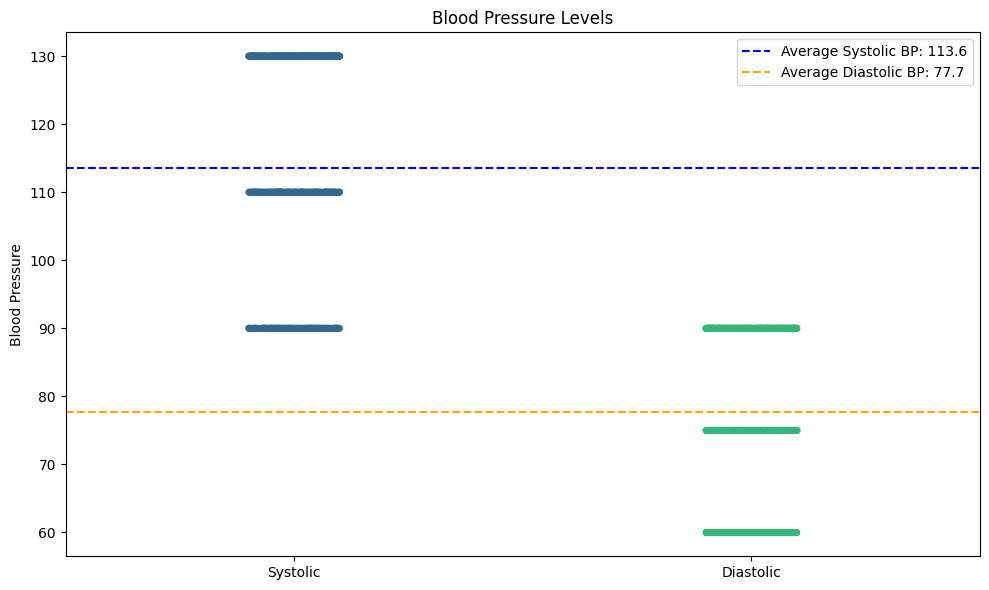

In [22]:
num_headaches = len(df.loc[df["headache"] > 2])

def calc_systolic(row):
    if row["blood_pressure"] == 1:
        return 90 
    if row["blood_pressure"] == 2:
        return 110 
    else:
        return 130

def calc_diastolic(row):
    if row["blood_pressure"] == 1:
        return 60
    if row["blood_pressure"] == 2:
        return 75
    else:
        return 90

df_bp  = pd.DataFrame()
df_bp[["systolic", "diastolic"]] = df.apply([calc_systolic, calc_diastolic], axis=1)

avg_systolic_bp = round(df_bp["systolic"].mean(), 1)
avg_diastolic_bp = round(df_bp["diastolic"].mean(), 1)

num_bad_sleep_quality = len(df.loc[df["sleep_quality"] < 3])

print(f"Number of students experiencing headaches frequently: {num_headaches}")
print(f"The average blood pressure is: {avg_systolic_bp}/{avg_diastolic_bp}")
print(f"Number of students with bad sleep quality: {num_bad_sleep_quality}")

plt.figure(figsize=(10, 6))

counts_headaches = [num_headaches, 1100 - num_headaches]
labels_headaches = ['Frequent Headaches', 'Others']
plt.subplot(121)
plt.pie(counts_headaches, labels=labels_headaches, autopct='%1.1f%%', colors=['blue', 'lightblue'])
plt.title('Percentage of Students Experiencing Frequent Headaches')

plt.subplot(122)
sns.histplot(df['sleep_quality'], bins=5, kde=True, color='green')
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

sns.stripplot(x=['Systolic'] * len(df_bp['systolic']) + ['Diastolic'] * len(df_bp['diastolic']),
              y=list(df_bp['systolic']) + list(df_bp['diastolic']),
              hue=['Systolic'] * len(df_bp['systolic']) + ['Diastolic'] * len(df_bp['diastolic']),
              palette='viridis', size=5, jitter=True, alpha=0.7, legend=False)

plt.axhline(avg_systolic_bp, color='blue', linestyle='--', label=f'Average Systolic BP: {avg_systolic_bp}')
plt.axhline(avg_diastolic_bp, color='orange', linestyle='--', label=f'Average Diastolic BP: {avg_diastolic_bp}')

plt.title('Blood Pressure Levels')
plt.ylabel('Blood Pressure')
plt.legend()
plt.tight_layout()

plt.show()

<font size="5">_Environmental Factors:_<font>

**9. How many students live in conditions with high noise levels?**

In [23]:
df['noise_level'].describe()

count    1100.000000
mean        2.649091
std         1.328127
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: noise_level, dtype: float64

From the percentile information, it's evident that the majority (75%) of the students report a noise level of 3 or lower. This indicates that 4 and 5 are considered "high" noise levels.

Number of students who reported high noise levels: 274


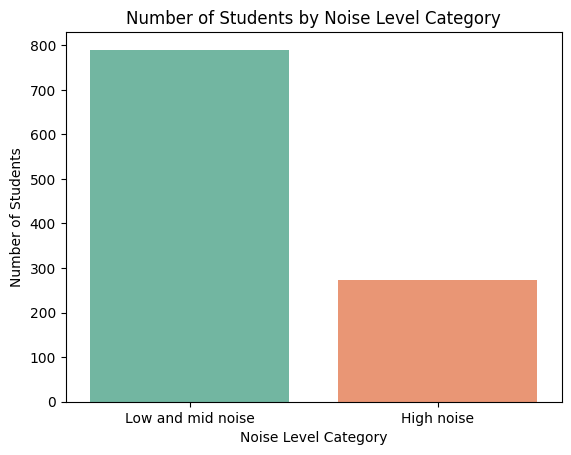

In [24]:
print(f"Number of students who reported high noise levels: {(df['noise_level']>=4).sum()}")

df_noise_level = df['noise_level']
df_noise_level = pd.cut(df_noise_level, bins = [0, 3, 5], labels = ['Low and mid noise', 'High noise'])
sns.barplot(x=df_noise_level.value_counts().index, 
            y=df_noise_level.value_counts().values, 
            hue=df_noise_level.value_counts().index, 
            palette='Set2', 
            dodge=False, 
            legend=False)
plt.xlabel('Noise Level Category')
plt.ylabel('Number of Students')
plt.title('Number of Students by Noise Level Category')
plt.show()

**10. What percentage of students feel unsafe in their living conditions?**

In [25]:
df['safety'].describe()

count    1100.000000
mean        2.737273
std         1.406171
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: safety, dtype: float64

Values of 0 and 1 are classified as "unsafe," following the same procedure applied to noise levels previously.

Number of students who feel unsafe: 217
Percentage of students who feel unsafe: 19.73%


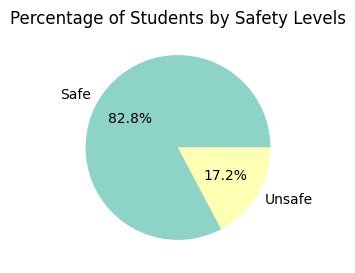

In [26]:
num_unsafe_students = (df['safety'] <= 1).sum()
percentage_unsafe_students = (num_unsafe_students / len(df)) * 100
print(f"Number of students who feel unsafe: {num_unsafe_students}")
print(f"Percentage of students who feel unsafe: {percentage_unsafe_students:.2f}%")

df_safety = df['safety']
df_safety = pd.cut(df_safety, bins=[0, 1, 5], labels=['Unsafe', 'Safe'])

safety_counts = df_safety.value_counts()

plt.figure(figsize=(5, 3))
plt.pie(safety_counts, labels=safety_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Percentage of Students by Safety Levels')
plt.show()


<font size="5">_Academic Factors:_<font>

**11. How many students rate their academic performance as below average?**

**12. What is the average study load reported by students?**

**13. How many students have concerns about their future careers?**

Number of students with below-average academic performance: 561
Average study load reported by students: 2.6218181818181816
Number of students with concerns about their future careers: 327


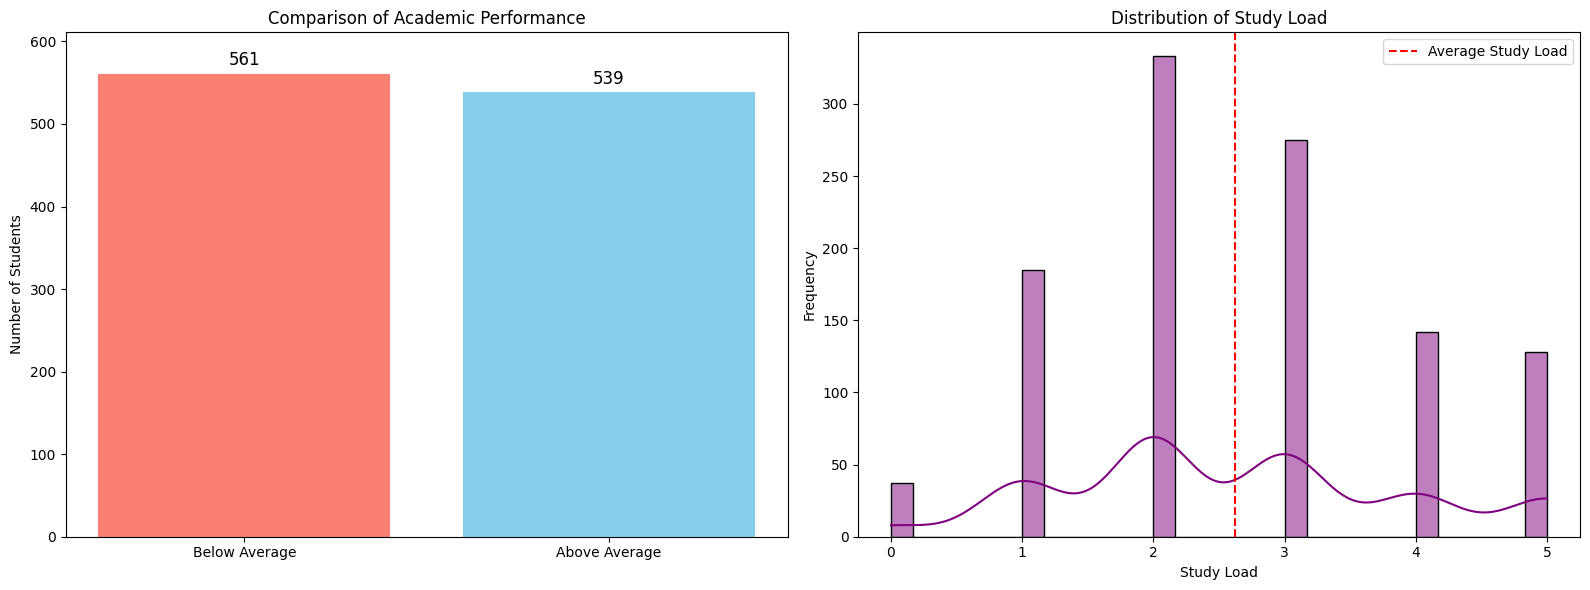

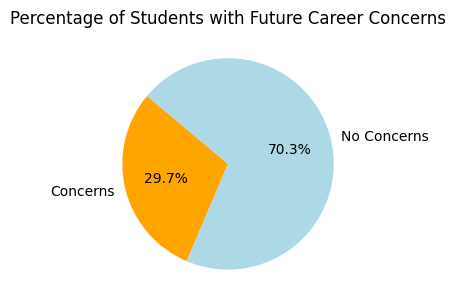

In [27]:
students_below_average_academic_performance = df[df['academic_performance'] < 3]
num_students_below_average_academic_performance = len(students_below_average_academic_performance)
num_students_above_average_academic_performance = len(df) - num_students_below_average_academic_performance

average_study_load = df['study_load'].mean()

students_with_future_career_concerns = df[df['future_career_concerns'] == 1]
num_students_with_future_career_concerns = len(students_with_future_career_concerns)

print("Number of students with below-average academic performance:", num_students_below_average_academic_performance)
print("Average study load reported by students:", average_study_load)
print("Number of students with concerns about their future careers:", num_students_with_future_career_concerns)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

labels = ['Below Average', 'Above Average']
sizes = [num_students_below_average_academic_performance, num_students_above_average_academic_performance]
colors = ['salmon', 'skyblue']
axes[0].bar(labels, sizes, color=colors)
axes[0].set_title('Comparison of Academic Performance')
axes[0].set_ylabel('Number of Students')
axes[0].set_ylim(0, max(sizes) + 50)

for i, value in enumerate(sizes):
    axes[0].text(i, value + 5, str(value), ha='center', va='bottom', fontsize=12)

sns.histplot(df['study_load'], bins=30, kde=True, color='purple', ax=axes[1])
axes[1].axvline(average_study_load, color='red', linestyle='--', label='Average Study Load')
axes[1].set_title('Distribution of Study Load')
axes[1].set_xlabel('Study Load')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(4, 4))

labels = ['Concerns', 'No Concerns']
sizes = [num_students_with_future_career_concerns, len(df) - num_students_with_future_career_concerns]
colors = ['orange', 'lightblue']
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax.set_title('Percentage of Students with Future Career Concerns')

plt.tight_layout()
plt.show()


<font size="5">_Social Factors:_<font>

**14. How many students feel they have strong social support?**

**15. What percentage of students have experienced bullying?**

**16. How many students participate in extracurricular activities?**

Number of students with strong social support: 458
Percentage of students experiencing bullying: 32.73%
Number of students participating in extracurricular activities: 184


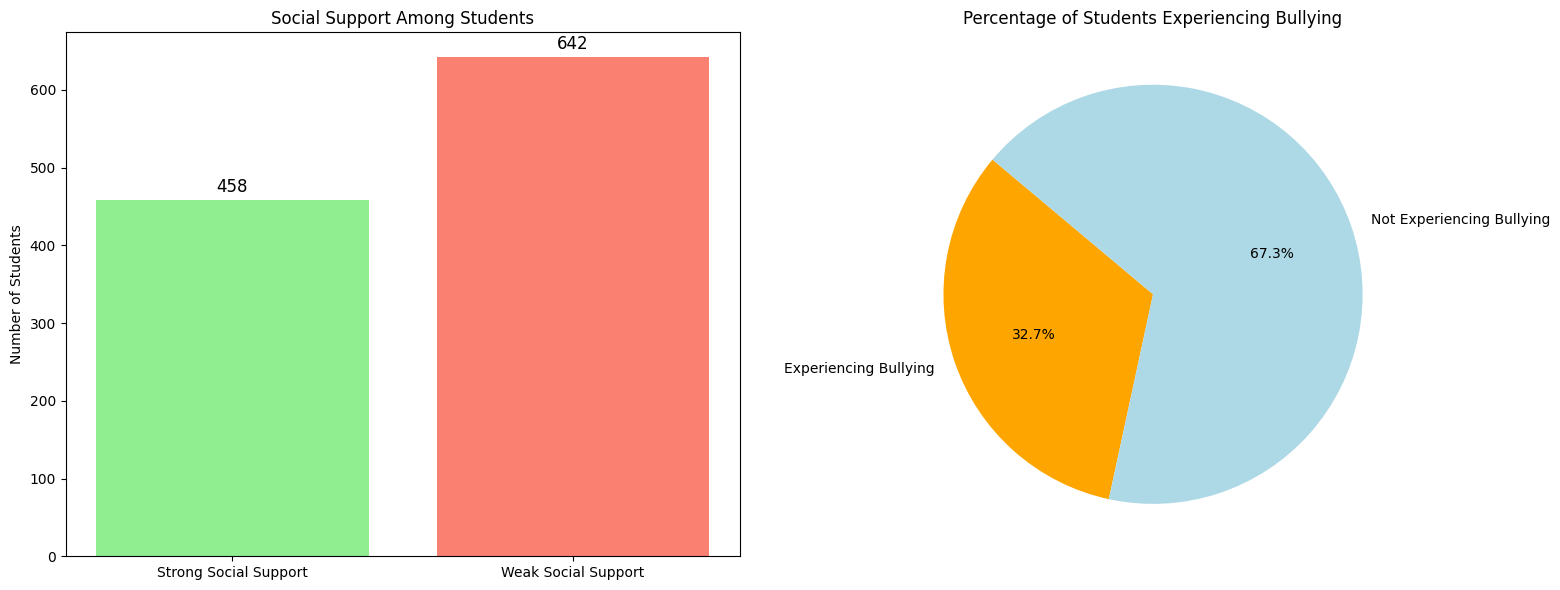

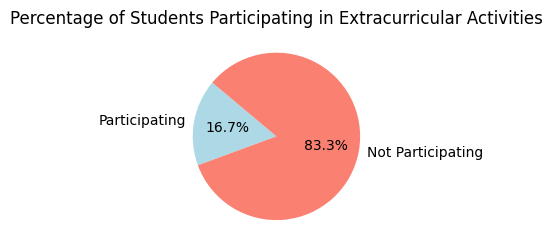

In [28]:
students_with_strong_social_support = df[df['social_support'] > 2]
num_students_with_strong_social_support = len(students_with_strong_social_support)

bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

if 'num_students' not in locals():
    num_students = len(df)

percentage_students_experiencing_bullying = (df['bullying_binary'].sum() / num_students) * 100

num_students_participating_in_extracurricular = len(df[df['extracurricular_activities'] == 1])

print(f"Number of students with strong social support: {num_students_with_strong_social_support}")
print(f"Percentage of students experiencing bullying: {percentage_students_experiencing_bullying:.2f}%")
print(f"Number of students participating in extracurricular activities: {num_students_participating_in_extracurricular}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

labels_support = ['Strong Social Support', 'Weak Social Support']
sizes_support = [num_students_with_strong_social_support, num_students - num_students_with_strong_social_support]
colors_support = ['lightgreen', 'salmon']
axes[0].bar(labels_support, sizes_support, color=colors_support)
axes[0].set_title('Social Support Among Students')
axes[0].set_ylabel('Number of Students')

for i, value in enumerate(sizes_support):
    axes[0].text(i, value + 5, str(value), ha='center', va='bottom', fontsize=12)

labels_bullying = ['Experiencing Bullying', 'Not Experiencing Bullying']
sizes_bullying = [df['bullying_binary'].sum(), num_students - df['bullying_binary'].sum()]
colors_bullying = ['orange', 'lightblue']
axes[1].pie(sizes_bullying, labels=labels_bullying, colors=colors_bullying, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Percentage of Students Experiencing Bullying')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(4, 4))

labels_extracurricular = ['Participating', 'Not Participating']
sizes_extracurricular = [num_students_participating_in_extracurricular, num_students - num_students_participating_in_extracurricular]
colors_extracurricular = ['lightblue', 'salmon']
ax.pie(sizes_extracurricular, labels=labels_extracurricular, colors=colors_extracurricular, autopct='%1.1f%%', startangle=140)
ax.set_title('Percentage of Students Participating in Extracurricular Activities')

plt.tight_layout()
plt.show()


**_c) Comparative Analysis:_**

**17. How do various psychological, physiological, environmental, academic, and social factors correlate with student stress levels**

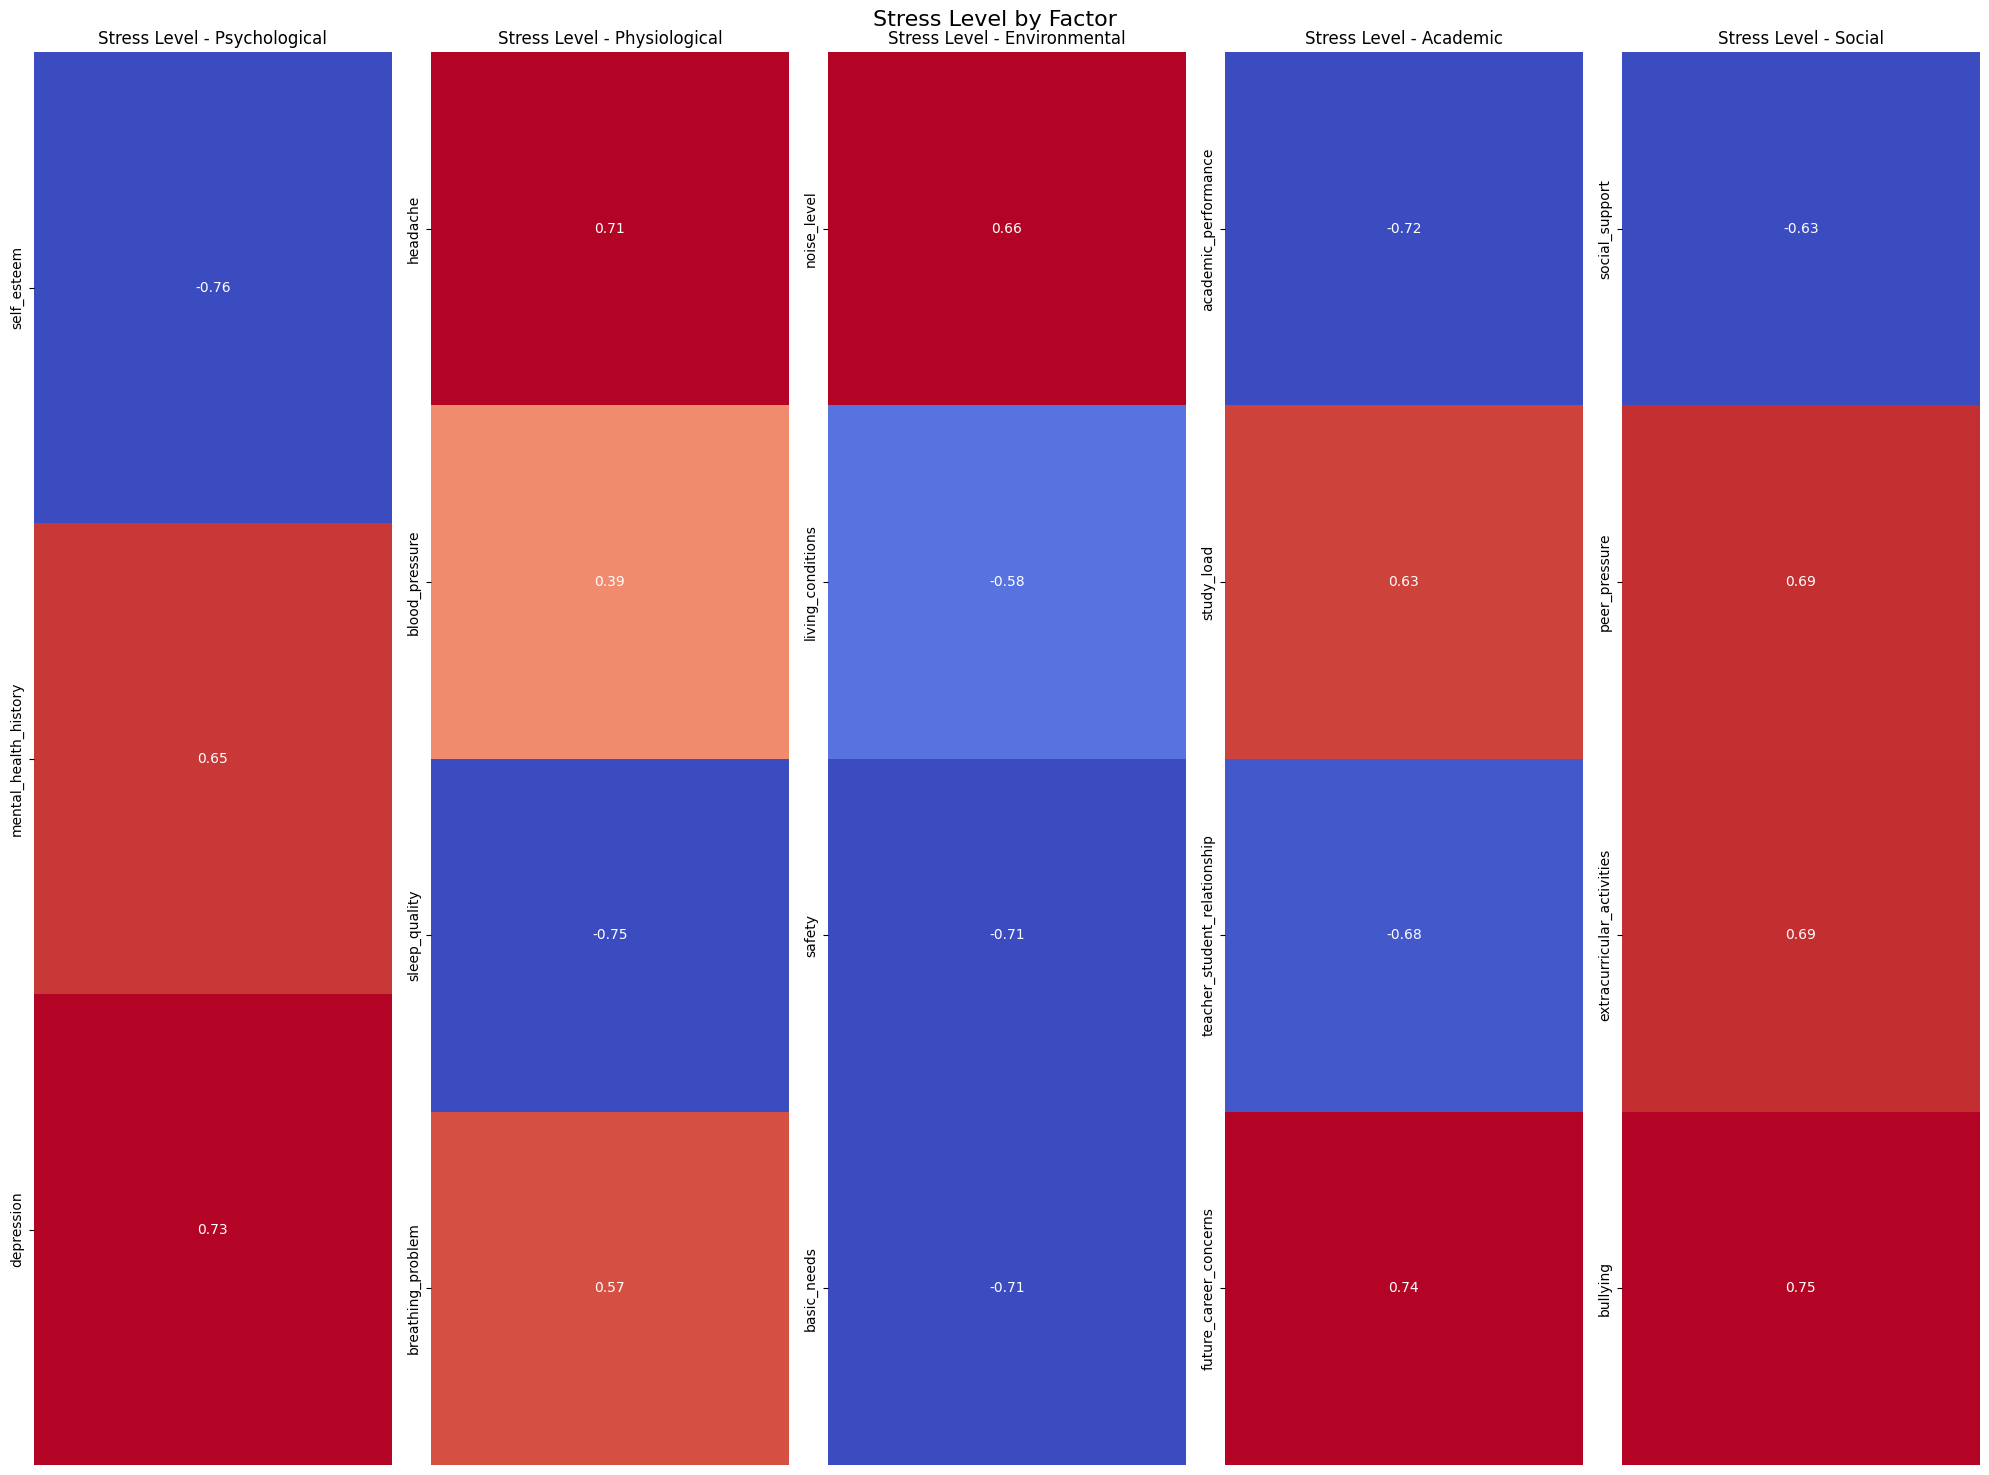

In [29]:
factors = {
    'Psychological': ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'safety', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'],
    'Social': ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
}

psychological_df = df[factors['Psychological']].copy()
psychological_df.drop(columns=['anxiety_level'], inplace=True)

physiological_df = df[factors['Physiological']]
environmental_df = df[factors['Environmental']]
academic_df = df[factors['Academic']]
social_df = df[factors['Social']]

fig, axes = plt.subplots(1, 5, figsize=(20, 15))

psychological_corr = psychological_df.corrwith(df['stress_level'])
sns.heatmap(psychological_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_title('Stress Level - Psychological')
axes[0].set_xticks([])

physiological_corr = physiological_df.corrwith(df['stress_level'])
sns.heatmap(physiological_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_title('Stress Level - Physiological')
axes[1].set_xticks([])

environmental_corr = environmental_df.corrwith(df['stress_level'])
sns.heatmap(environmental_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[2])
axes[2].set_title('Stress Level - Environmental')
axes[2].set_xticks([])

academic_corr = academic_df.corrwith(df['stress_level'])
sns.heatmap(academic_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[3])
axes[3].set_title('Stress Level - Academic')
axes[3].set_xticks([])

social_corr = social_df.corrwith(df['stress_level'])
sns.heatmap(social_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[4])
axes[4].set_title('Stress Level - Social')
axes[4].set_xticks([])

fig.suptitle('Stress Level by Factor', fontsize=16)
plt.tight_layout()

plt.show()


According to the heatmap, the factors chosen for analysis stress level are anxiety level, self-esteem, depression, sleep quality, academic performance, mental health history, and future career concerns, which is based on their strong correlations with stress level. 

A Random Forest Regressor will be employed to assess the importance of specific features within each defined factor, including psychological, physiological, environmental, academic, and social aspects. The results provide insights into which features most significantly impact student stress.

**18. Which specific feature within each factor has the most significant impact on student stress, based on the dataset?**

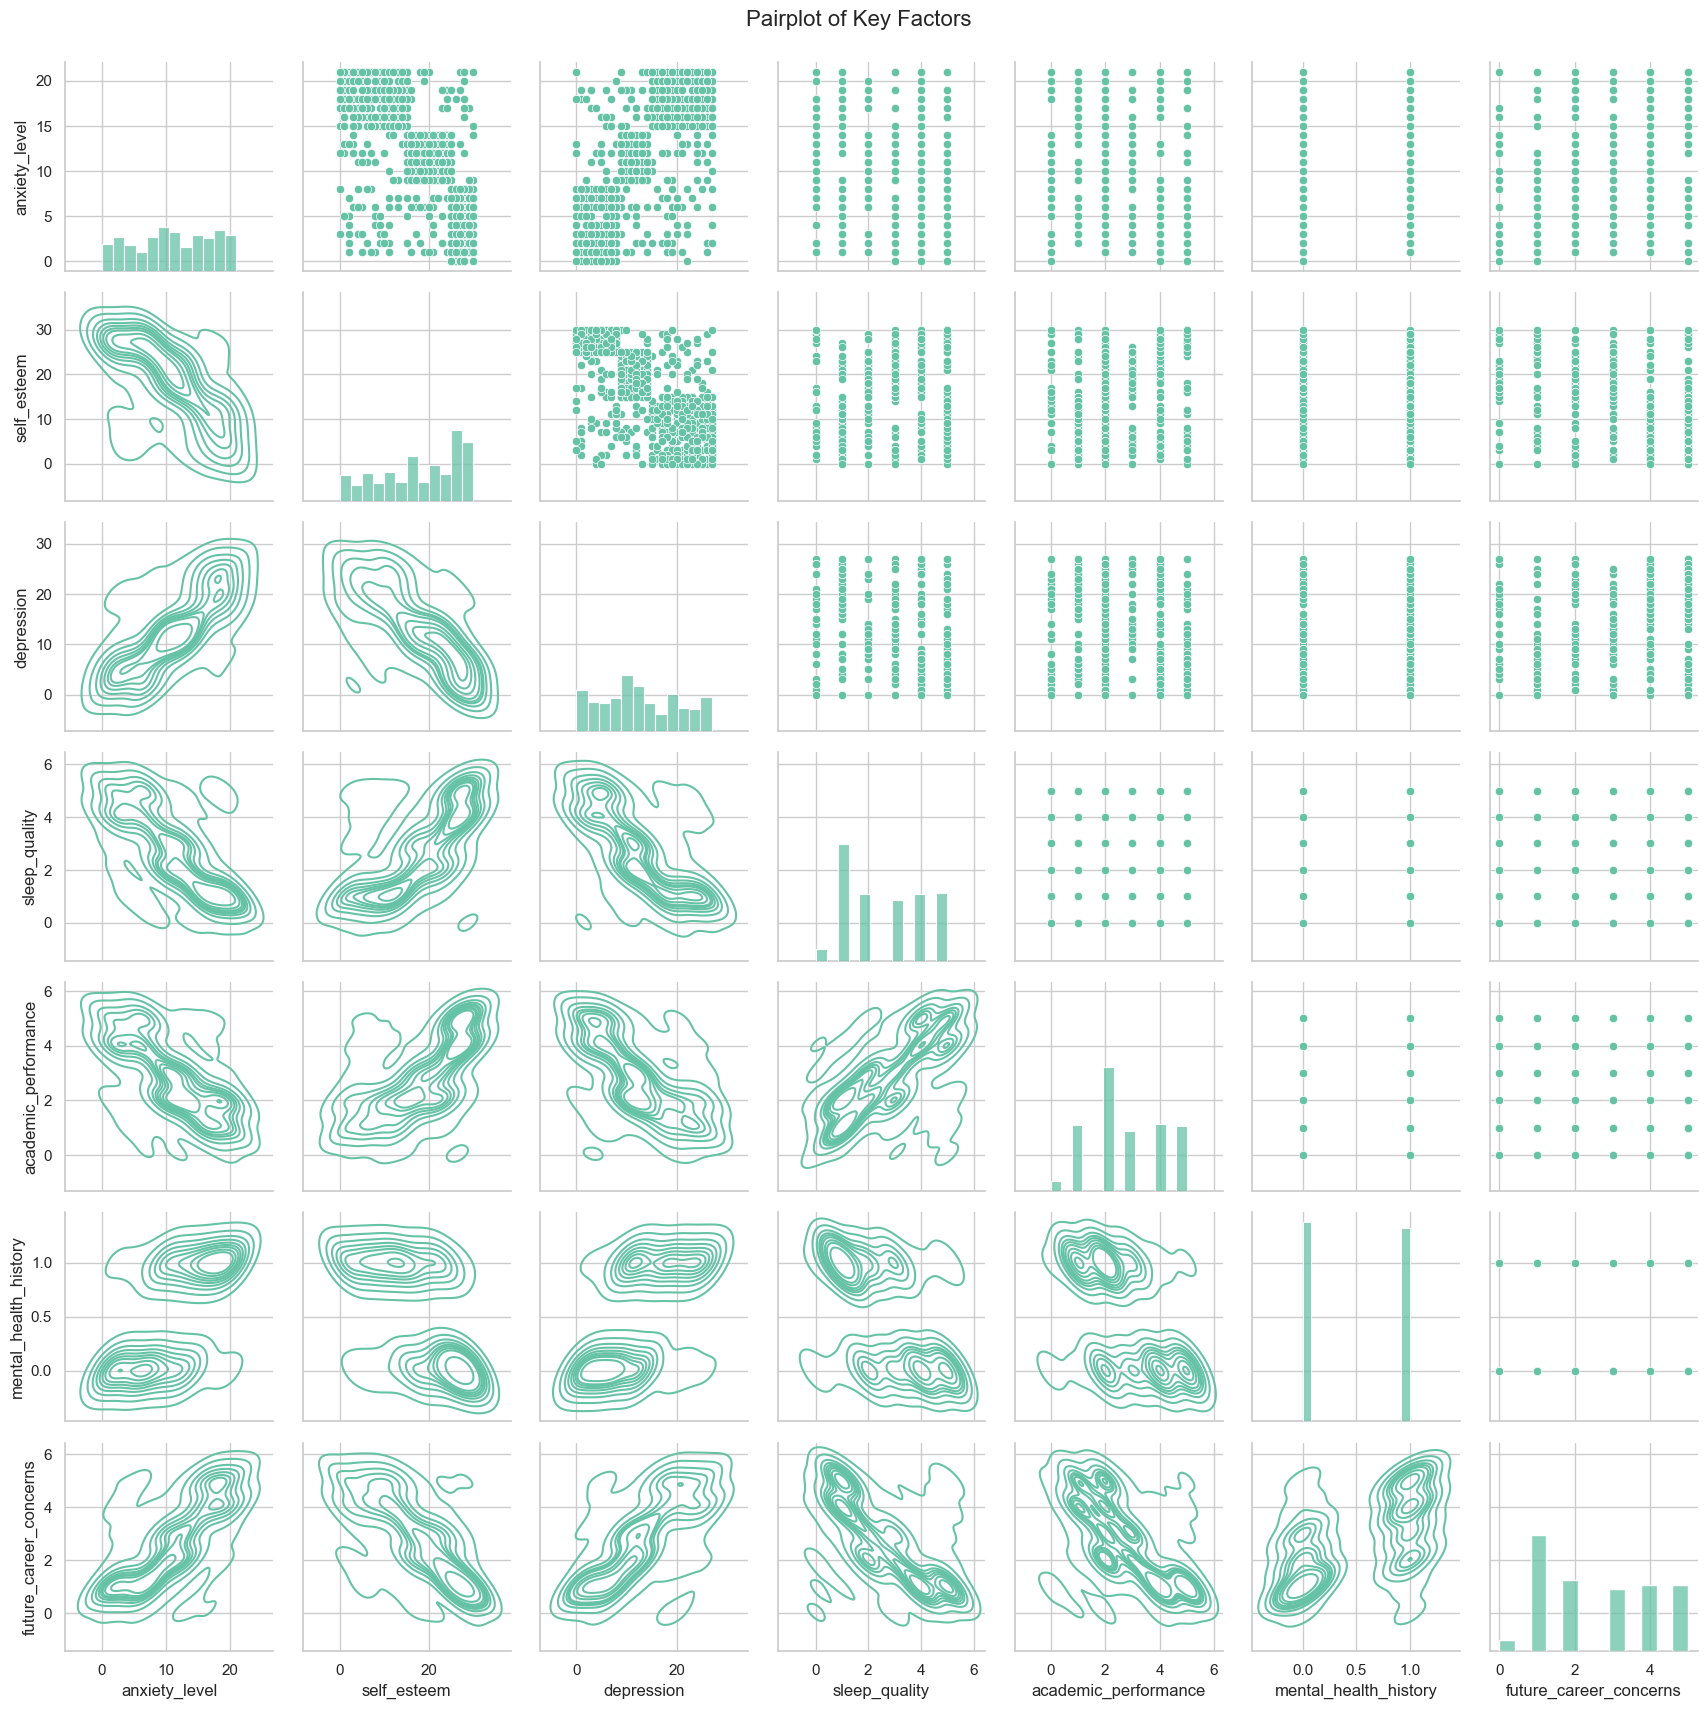

Factor: Psychological
- Feature: anxiety_level, Importance: 0.22761637965147277
- Feature: self_esteem, Importance: 0.5569989022354291
- Feature: mental_health_history, Importance: 0.02167630017782261
- Feature: depression, Importance: 0.1937084179352755

Factor: Physiological
- Feature: headache, Importance: 0.39008576832944886
- Feature: blood_pressure, Importance: 0.04933585165937374
- Feature: sleep_quality, Importance: 0.491294451219844
- Feature: breathing_problem, Importance: 0.06928392879133344

Factor: Environmental
- Feature: noise_level, Importance: 0.15657497713677423
- Feature: living_conditions, Importance: 0.12318388689932008
- Feature: safety, Importance: 0.30776783415421244
- Feature: basic_needs, Importance: 0.4124733018096933

Factor: Academic
- Feature: academic_performance, Importance: 0.39999332025391976
- Feature: study_load, Importance: 0.10402338512058161
- Feature: teacher_student_relationship, Importance: 0.2690872208557167
- Feature: future_career_concerns, 

In [30]:
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid", palette="Set2")

factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 
                       'academic_performance', 'mental_health_history', 
                       'future_career_concerns']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})

plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Key Factors", size=16)
plt.show()

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

model = RandomForestRegressor()

feature_importance = {}

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)
    importance = model.feature_importances_

    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

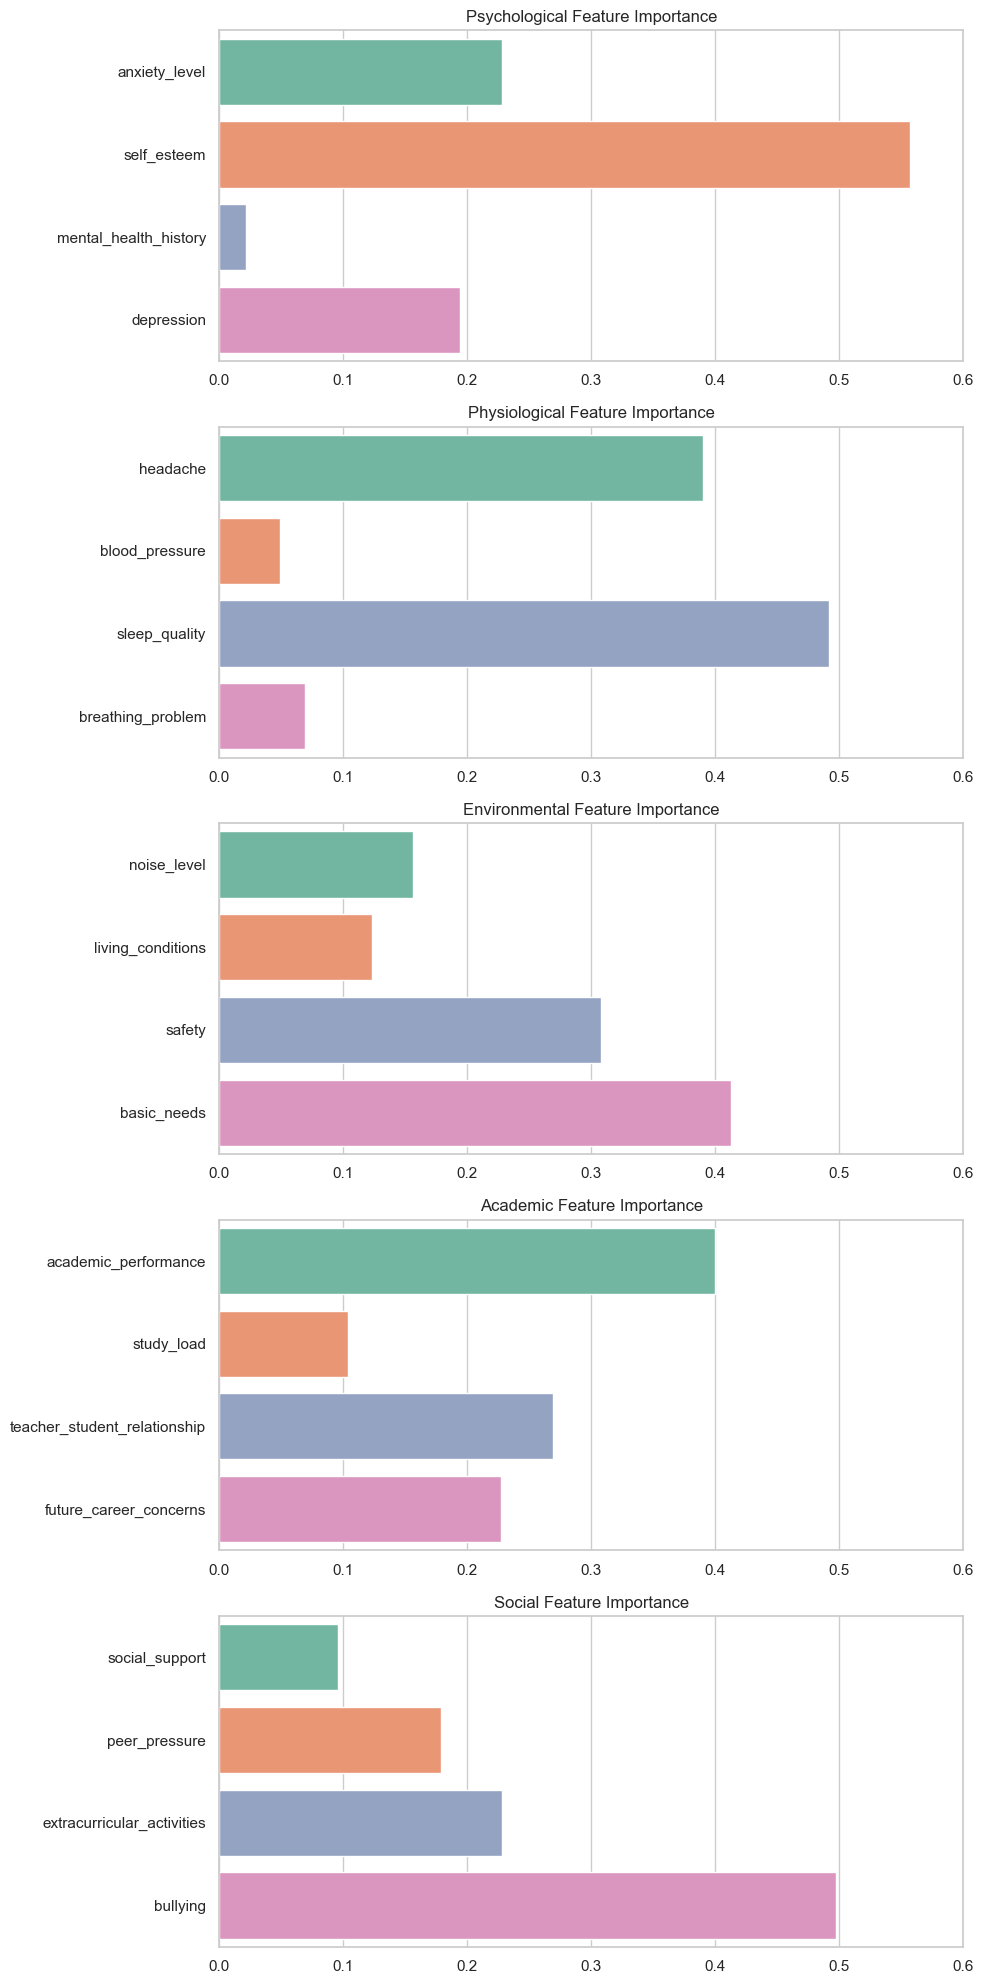

In [31]:
fig, axes = plt.subplots(len(feature_importance), 1, figsize=(10, 4 * len(feature_importance)))

for ax, (factor, importance_dict) in zip(axes, feature_importance.items()):
    features = list(importance_dict.keys())
    importances = list(importance_dict.values())
    
    sns.barplot(x=importances, y=features, ax=ax, hue=features, palette='Set2', legend=False)
    ax.set_title(f'{factor} Feature Importance')
    ax.set_xlim(0, 0.6)  

plt.tight_layout()
plt.show()

The specific features within each factor that have the most significant impact on student stress, based on the dataset, are as follows: **Self-Esteem** from the Psychological factor (Importance: 0.5595), **Sleep Quality** from the Physiological factor (Importance: 0.4981), **Basic Needs** from the Environmental factor (Importance: 0.4237), **Academic Performance** from the Academic factor (Importance: 0.3888), and **Bullying** from the Social factor (Importance: 0.4952). These features are the most influential in affecting student stress levels

### 4. Predictive Modeling:

_**Step 1: Data Preparation**_

First, import the necessary libraries and prepare the dataset by splitting it into training and testing sets.

In [32]:
from sklearn.model_selection import train_test_split

features = ['self_esteem', 'sleep_quality', 'basic_needs', 'academic_performance', 'bullying']
X = df[features]
y = df['stress_level'] 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

_**Step 2: Data Scaling**_

Scale the features for better performance in algorithms.

In [33]:
from sklearn.preprocessing import StandardScaler

features = ['self_esteem', 'sleep_quality', 'basic_needs', 'academic_performance', 'bullying']
X = df[features]
y = df['stress_level'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

_**Step 3: Model Selection and Training**_

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

param_grid = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
}

best_models = {}

for model_name, model in models.items():
    grid = GridSearchCV(model, param_grid[model_name], cv=5)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_

_**Step 4: Model Evaluation**_

Evaluate the performance of each model on the test set.

In [35]:
from sklearn import metrics

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Classification Report:\n{metrics.classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])}\n")

KNN Accuracy: 0.90
KNN Classification Report:
              precision    recall  f1-score   support

         Low       0.95      0.91      0.93        76
      Medium       0.87      0.90      0.89        73
        High       0.89      0.89      0.89        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220


Decision Tree Accuracy: 0.89
Decision Tree Classification Report:
              precision    recall  f1-score   support

         Low       0.91      0.89      0.90        76
      Medium       0.87      0.93      0.90        73
        High       0.88      0.83      0.86        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220


Random Forest Accuracy: 0.88
Random Forest Classification Report:
              precision    recall  f1-score   support

   

Overall, KNN is the best performer in this case, but all models show good predictive ability for classifying student stress levels.

### 5. Results and Discussion:

All research questions have been addressed:

_**1. How do psychological, physiological, social, environmental, and academic factors correlate with the stress levels of students?**_
   
Psychological, physiological, social, environmental, and academic factors show significant correlations with student stress levels, indicating that these dimensions collectively impact overall stress.
   
_**2. What are the key features that significantly influence student stress levels?**_

Key features significantly influencing student stress levels include self-esteem, sleep quality, basic needs, academic performance, and bullying.
   
_**3. How can we create a predictive model for student stress based on these identified factors?**_

KNN, Random Forest and Decision Tree have demonstrated high accuracy in classifying stress levels based on the identified factors.
   
_**4. How can interventions be tailored based on the identified stress factors to effectively reduce student stress level?**_
   
To effectively reduce student stress levels, interventions should target specific stress factors. This includes:
   
   - Providing mental health support for the 507 students with below-average self-esteem and the 56.36% experiencing depression through counseling and workshops.
     
   - Stress management techniques, such as mindfulness training, are recommended for the average anxiety level of 11.06 and the 556 students reporting frequent headaches.
     
   - Initiatives promoting healthy sleep habits are essential for the 550 students with poor sleep quality.
     
   - Enhancing campus safety for 217 students and reducing noise levels for 274 students are also crucial.
     
   - Academic support for the 561 students with below-average performance and career counseling for the 327 students concerned about their futures can alleviate pressures.
     
   - Finally, encouraging participation in extracurricular activities among the 184 involved can foster social support and resilience, contributing to a healthier educational environment.

_**Limitations and Future Prospective Work:**_

The predictive model's accuracy may improve with more effective data scaling methods, as not all values in the dataset are measured on the same scale. Different features necessitate distinct analytical approaches to accommodate their unique scales and value types, which can significantly influence data analysis and interpretation.